1. Sagemaker lab (google colab) solicitar la creación
2. Prepocesamiento/Feature Engineering (imputar, borrar, normalizar, etc,)
3. Predecir si una persona va a ganar más de 50k o menos de 50k
	Naive Bayes
	Arboles de decisión
	Bosque Aleatorio
	XGboost
4. Las conclusiones tienen que estar autodocumentadas en el cuaderno de jupyter

Integrantes
- Jair Jose Acevedo
- Cristian Ferney Parada

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

#importo el modelo de naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#importo métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#importo librerías de validación cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import ipywidgets as widgets

#árboles
from sklearn import tree
from sklearn.tree import plot_tree

#Bosques
from sklearn.ensemble import RandomForestClassifier

print("Instalado!")

Instalado!


In [2]:
import os
# Obtener la lista de archivos en el directorio actual
files_in_directory = os.listdir()

# Imprimir la lista de archivos para verificar la existencia del archivo
print(files_in_directory)

['Getting Started.ipynb', 'images', '.ipynb_checkpoints', 'adult.csv', 'preprocesamiento.ipynb', 'preprocesamiento (3).ipynb', 'modeloNB.bin', 'modeloNB2.bin', 'modeloNB3.bin', 'ModeloArbol.bin', 'mi_arbol.jpg', 'modelobosque.bin', 'taller_ciencia_de_datos_terminado.ipynb', 'Untitled.ipynb']


In [3]:
df = pd.read_csv('https://github.com/adiacla/bigdata/raw/master/adult.csv.zip')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
#Vemos las estadisticas de los datos numericos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
#Visualizamos las columnas del dataframe
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [18]:
import pandas as pd

# Crear un DataFrame de ejemplo


# Contar el número de ocurrencias de "<=50K" para cada tipo de entrada en la columna "marital.status"
counts = df[df['income'] == '<=50K']['marital.status'].value_counts()

# Encontrar el tipo de entrada con más ocurrencias de "<=50K"
entry_with_max_occurrences = counts.idxmax()
max_occurrences = counts.max()

print(f"El tipo de entrada que tiene más '<=50K' en la columna 'income' es '{entry_with_max_occurrences}' con {max_occurrences} ocurrencias.")


El tipo de entrada que tiene más '<=50K' en la columna 'income' es 'Married-spouse-absent' con 1 ocurrencias.


In [20]:
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       1
Married-spouse-absent    1
Married-AF-spouse        1
Widowed                  1
Divorced                 1
Name: count, dtype: int64

In [9]:
#Vamos a ver la cantidad de personas que ganan >=50K y >50K
income_counts = df['income'].value_counts()
print(income_counts)


income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [10]:
#Verificamos que no hayan datos nulos.
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


No tenemos datos númericos nulos, por lo que no borraremos ninguna columna por esta razon.

Para esta predicción, elegimos las siguientes columnas para entrenarlo:
'age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income','race'

Para la columna race, la convertiremos en datos numericos usando get_dummies.
Para la columna income y sex los convertiremos en datos binarios, aprovechando que solo hay 2 tipos de respuesta en ambas columnas.

In [11]:
# Aplica la codificación binaria a las columnas no numericas
df_encoded = pd.get_dummies(df, columns=['race'], dtype=int)
df_encoded['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df_encoded['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

# Muestra las primeras filas del DataFrame codificado
print(df_encoded.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship  sex  capital.gain  capital.loss  \
0                  ?  Not-in-family    1             0          4356   
1    Exec-managerial  Not-in-family    1             0          4356   
2                  ?      Unmarried    1             0          4356   
3  Machine-op-inspct      Unmarried    1             0          3900   
4     Prof-specialty      Own-child    1             0          3900   

   hours.per.week native.country  income  race_Amer-Indian-Eskimo  \
0              40  United-States       0                        0

In [12]:
df_encoded.dtypes

age                         int64
workclass                  object
fnlwgt                      int64
education                  object
education.num               int64
marital.status             object
occupation                 object
relationship               object
sex                         int64
capital.gain                int64
capital.loss                int64
hours.per.week              int64
native.country             object
income                      int64
race_Amer-Indian-Eskimo     int64
race_Asian-Pac-Islander     int64
race_Black                  int64
race_Other                  int64
race_White                  int64
dtype: object

In [13]:
df_encoded.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White'],
      dtype='object')

Borramos las columnas que no usaremos.

In [14]:
columnas_a_borrar = ['workclass','education', 'marital.status', 'occupation', 'relationship', 'native.country']

# Borra las columnas del DataFrame
df_encoded = df_encoded.drop(columnas_a_borrar, axis=1)

In [15]:
df_encoded.columns

Index(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'],
      dtype='object')

In [16]:
caracteristicas=['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White']

Vemos las grafica de nuestro nuevo dataframe.

<Axes: >

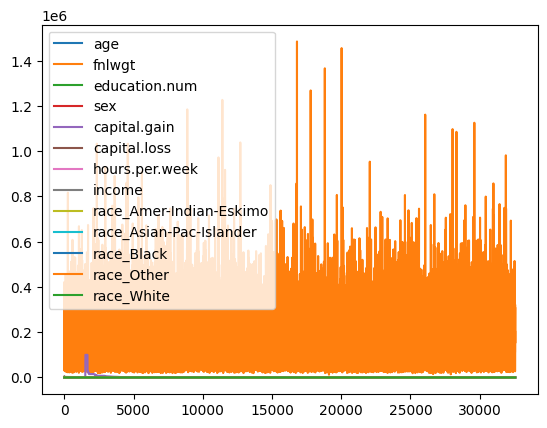

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
df_encoded.plot()

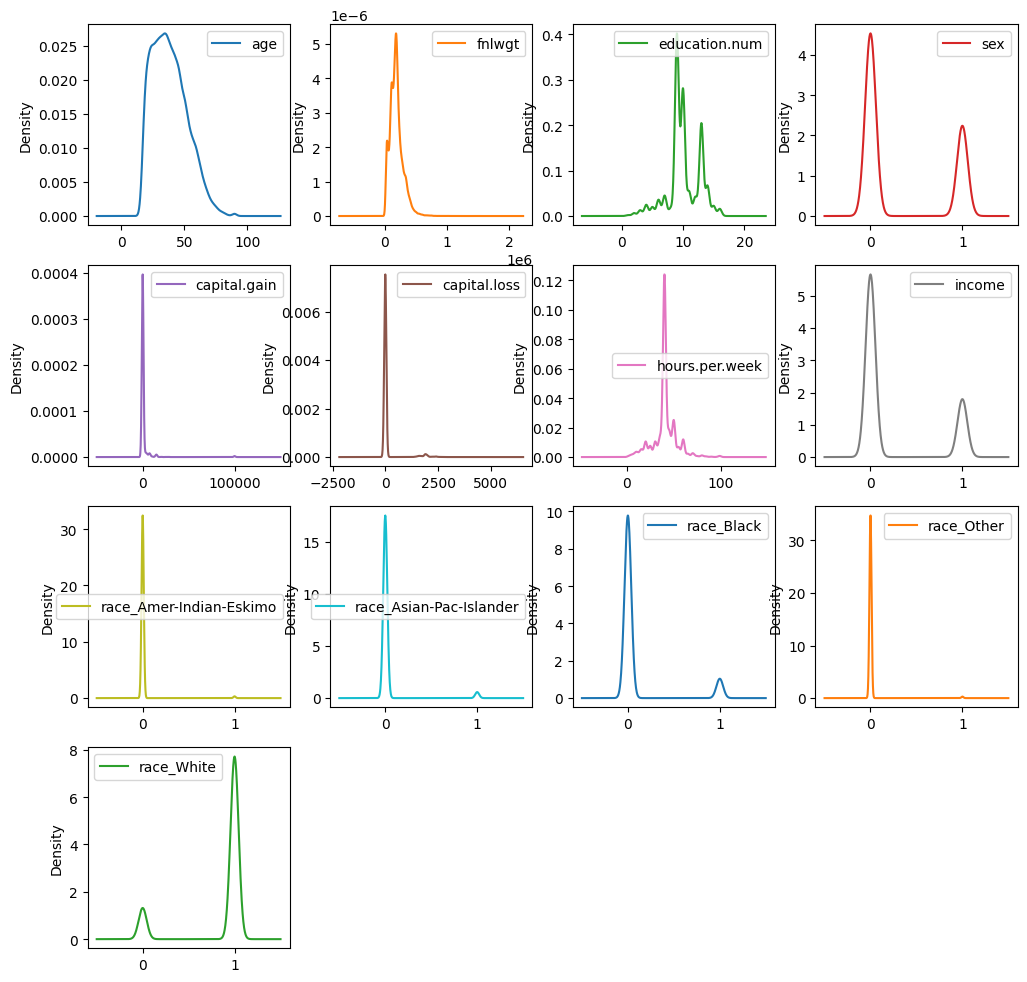

In [18]:
df_encoded.plot(kind='density',subplots=True,layout=(4,4),figsize=(12,12),sharex=False)
plt.show()

<Axes: ylabel='Density'>

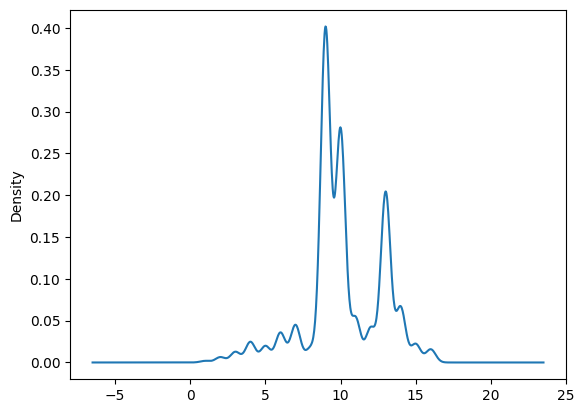

In [19]:
df['education.num'].plot.density()

<Axes: >

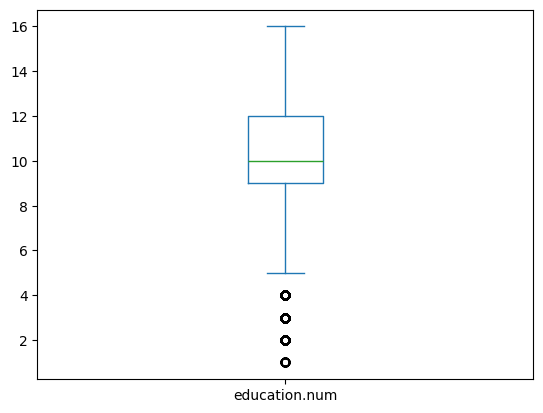

In [20]:
df_encoded['education.num'].plot.box()

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      32561 non-null  int64
 1   fnlwgt                   32561 non-null  int64
 2   education.num            32561 non-null  int64
 3   sex                      32561 non-null  int64
 4   capital.gain             32561 non-null  int64
 5   capital.loss             32561 non-null  int64
 6   hours.per.week           32561 non-null  int64
 7   income                   32561 non-null  int64
 8   race_Amer-Indian-Eskimo  32561 non-null  int64
 9   race_Asian-Pac-Islander  32561 non-null  int64
 10  race_Black               32561 non-null  int64
 11  race_Other               32561 non-null  int64
 12  race_White               32561 non-null  int64
dtypes: int64(13)
memory usage: 3.2 MB


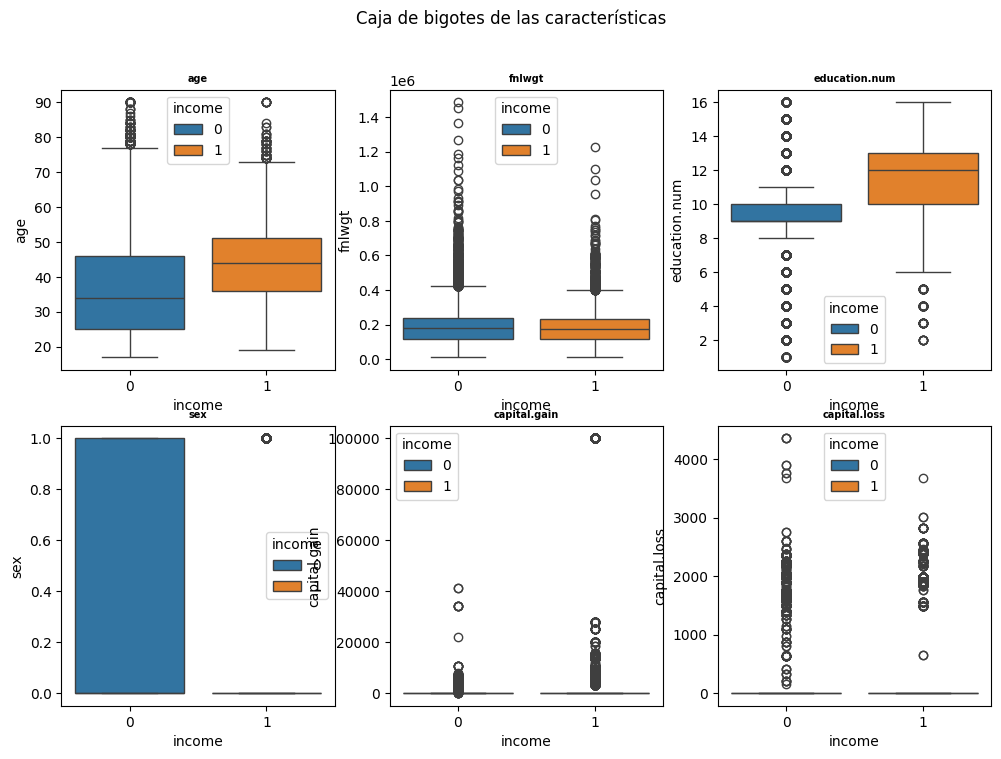

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flat[:len(caracteristicas)]  # Limita el tamaño de axes

# Ajusta el rango del bucle para evitar índices fuera de los límites
for i, columnas in enumerate(caracteristicas[:len(axes)]):
    sns.boxplot(x='income', y=columnas, data=df_encoded, hue='income', ax=axes[i])
    axes[i].set_title(columnas, fontsize=7, fontweight='bold')

fig.suptitle('Caja de bigotes de las características')
plt.show()

Vemos la relación entre las horas trabajas por semana dependiendo de la edad de la persona ver si podemos crear una conclusión, donde vemos que las personas de mayor edad trabajan menos horas.

<Axes: xlabel='hours.per.week', ylabel='age'>

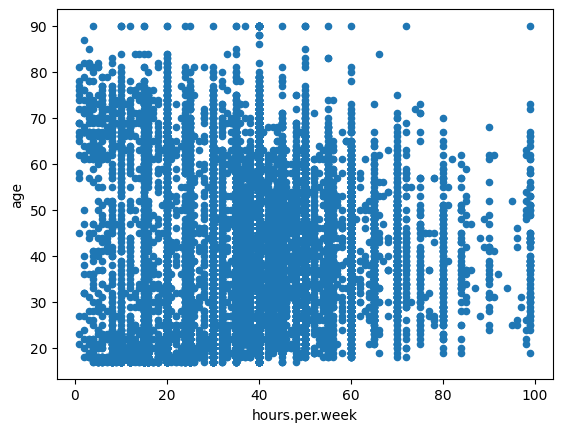

In [23]:
df_encoded.plot.scatter(x='hours.per.week', y='age')

<Axes: xlabel='hours.per.week', ylabel='age'>

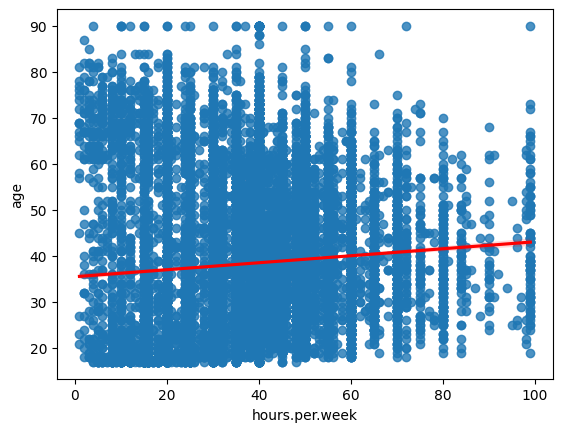

In [24]:
sns.regplot(x='hours.per.week', y='age', data=df_encoded, line_kws={"color":"red"})

<Axes: xlabel='income', ylabel='education.num'>

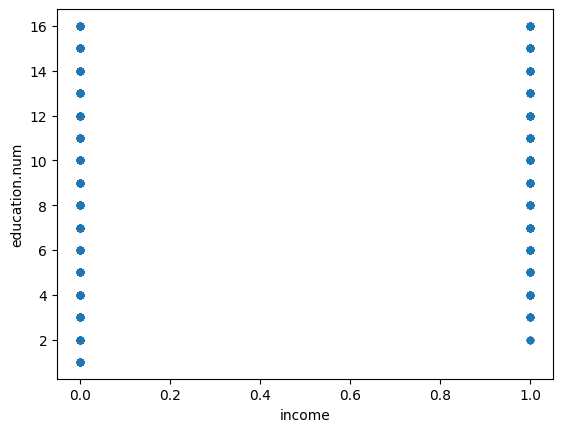

In [25]:
df_encoded.plot.scatter(x='income', y='education.num')

In [26]:
corr_matrix=df_encoded.corr()
corr_matrix

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
age,1.000000,-0.076646,0.036527,-0.088832,0.077674,0.057775,0.068756,0.234037,-0.010137,-0.011111,-0.019434,-0.034415,0.033412
fnlwgt,-0.076646,1.000000,-0.043195,-0.026858,0.000432,-0.010252,-0.018768,-0.009463,-0.064148,-0.051323,0.118009,0.006376,-0.056896
education.num,0.036527,-0.043195,1.000000,-0.012280,0.122630,0.079923,0.148123,0.335154,-0.029345,0.062091,-0.075272,-0.044133,0.051353
sex,-0.088832,-0.026858,-0.012280,1.000000,-0.048480,-0.045567,-0.229309,-0.215980,0.010820,0.000856,0.115604,0.013906,-0.103486
capital.gain,0.077674,0.000432,0.122630,-0.048480,1.000000,-0.031615,0.078409,0.223329,-0.006015,0.009851,-0.020631,-0.001774,0.014429
capital.loss,0.057775,-0.010252,0.079923,-0.045567,-0.031615,1.000000,0.054256,0.150526,-0.012947,0.004469,-0.021762,-0.005964,0.021044
hours.per.week,0.068756,-0.018768,0.148123,-0.229309,0.078409,0.054256,1.000000,0.229689,-0.003096,-0.004564,-0.053153,-0.007188,0.049345
income,0.234037,-0.009463,0.335154,-0.215980,0.223329,0.150526,0.229689,1.000000,-0.028721,0.010543,-0.089089,-0.031830,0.085224
race_Amer-Indian-Eskimo,-0.010137,-0.064148,-0.029345,0.010820,-0.006015,-0.012947,-0.003096,-0.028721,1.000000,-0.017829,-0.031991,-0.008996,-0.237763
race_Asian-Pac-Islander,-0.011111,-0.051323,0.062091,0.000856,0.009851,0.004469,-0.004564,0.010543,-0.017829,1.000000,-0.059144,-0.016632,-0.439572


In [27]:
df_encoded.columns

Index(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'],
      dtype='object')

In [28]:
colors = np.where (df_encoded["income"]==0, "green", "red")
def angulo (x,y):
    fig=plt.figure(figsize=(9,10))
    ax=fig.add_subplot(projection='3d')
    ax.scatter(df_encoded["age"],df_encoded["hours.per.week"],df_encoded["sex"], c=colors, marker="*")
    ax.fontsize=5,
    ax.view_init(x,y)
    ax.set_xlabel("age")
    ax.set_ylabel("hours.per.week")
    ax.set_zlabel("sex")
    plt.show()

grafico=widgets.interact(angulo, x=[60,-90,-45,0,30,45,90], y=[60,-90,-45,30,0,30,45,90])

interactive(children=(Dropdown(description='x', options=(60, -90, -45, 0, 30, 45, 90), value=60), Dropdown(des…

<Axes: >

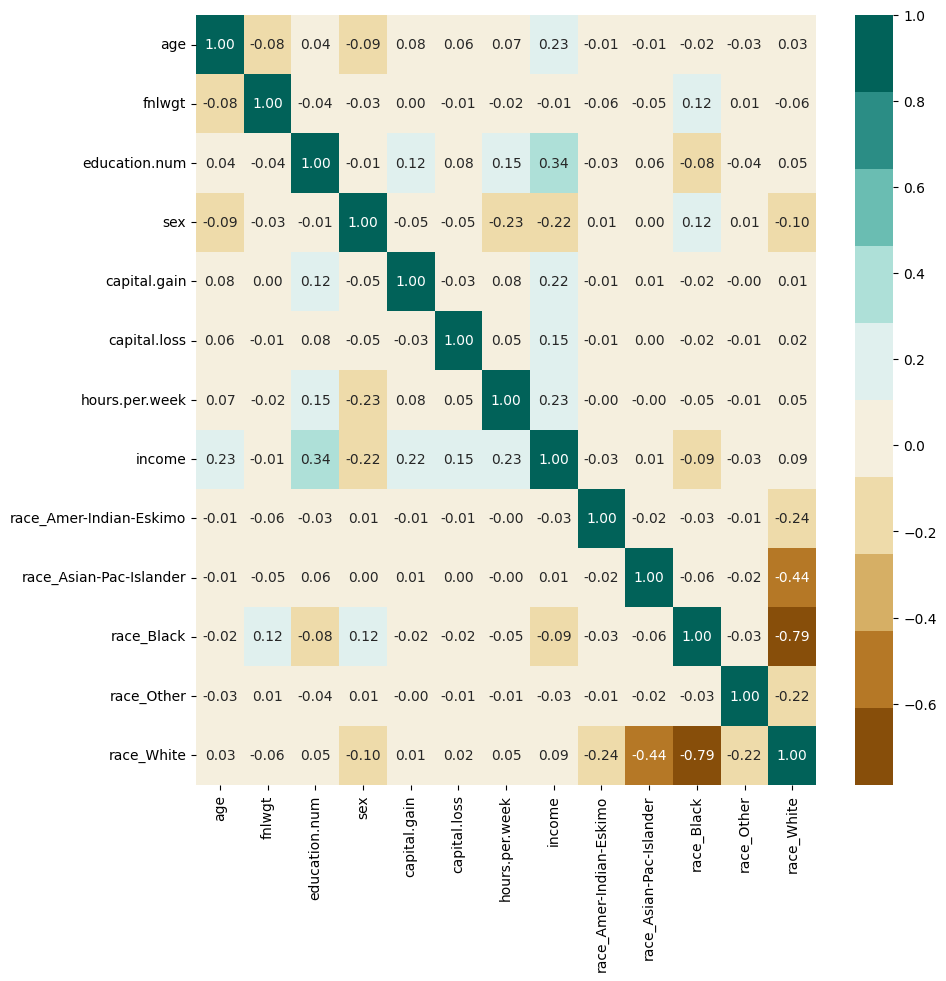

In [29]:
fig, axis=plt.subplots(figsize=(10,10))
colormap=sns.color_palette("BrBG",10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")

Ahora analizaremos la columna que nos interesa predecir, que es la columna income.

In [30]:
df_encoded['income'].unique()

array([0, 1])

In [31]:
df_encoded['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

Vemos un desbalance en la cantidad de datos, pero primero haremos la prueba de esta manera y analizaremos su resultado y una posible mejora.

In [32]:
X=df_encoded.drop("income",axis=1)
y=df_encoded["income"]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=454,stratify=df['income'])

Separamos el y_train y el y_test, el cual corresponde al 80% de los datos y el 20% de los datos, respectivamente.

In [34]:
y_train.value_counts()

income
0    19775
1     6273
Name: count, dtype: int64

In [35]:
y_test.value_counts()

income
0    4945
1    1568
Name: count, dtype: int64

In [36]:
len(X_train),(X_test)

(26048,
        age  fnlwgt  education.num  sex  capital.gain  capital.loss  \
 6608    34  346762              7    0             0             0   
 22281   29  253801              9    0             0             0   
 12894   40   99185             13    0             0             0   
 14755   38   60355              9    1             0             0   
 27726   30   95299              9    0             0             0   
 ...    ...     ...            ...  ...           ...           ...   
 13008   25  120238              9    0             0             0   
 22927   59   31137              9    0             0             0   
 32131   65  192825              4    0             0             0   
 9144    33  192644              9    0             0             0   
 31649   54  204397             10    0             0             0   
 
        hours.per.week  race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  \
 6608               84                        0               

In [37]:
modeloNB=GaussianNB()

In [38]:
modeloNB.fit(X_train,y_train)

GaussianNB()

In [39]:
import joblib as jb
#guardar el modelo modeloNB en un archivo
jb.dump(modeloNB, "modeloNB.bin", compress=True)

['modeloNB.bin']

Hacemos la predicción.

In [40]:
y_predict=modeloNB.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
y_predictdf = pd.DataFrame(y_predict, columns=["prediccion"])

In [43]:
y_test

6608     0
22281    0
12894    0
14755    0
27726    1
        ..
13008    0
22927    1
32131    0
9144     0
31649    0
Name: income, Length: 6513, dtype: int64

In [44]:
y_predictdf

,prediccion
0,0
1,0
2,0
3,0
4,0
...,...
6508,0
6509,0
6510,0
6511,0


In [45]:
y_test_ordenado=y_test.reset_index(drop=True)

In [46]:
comparativo = pd.concat([y_test_ordenado, y_predictdf], axis=1)
print(comparativo.head(20))

    income  prediccion
0        0           0
1        0           0
2        0           0
3        0           0
4        1           0
5        0           0
6        1           0
7        0           0
8        1           1
9        0           0
10       0           0
11       0           0
12       0           0
13       0           0
14       0           0
15       0           0
16       0           0
17       0           0
18       0           0
19       1           1


Evaluamos la primera predicción.

In [47]:
modeloNB.score(X_test,y_test)

0.7950253339474896

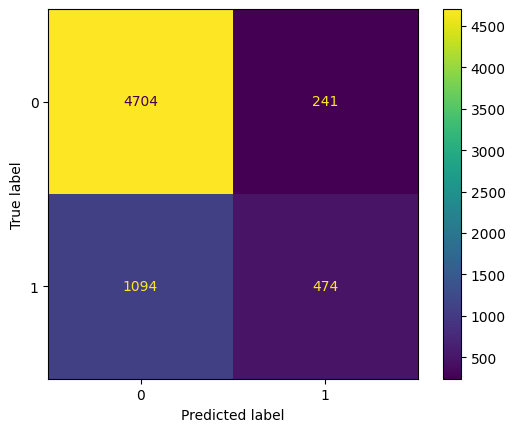

In [48]:
matrix=confusion_matrix(y_test,y_predict)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloNB.classes_)
mostrarMatrix.plot()

In [49]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4945
           1       0.66      0.30      0.42      1568

    accuracy                           0.80      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.78      0.80      0.76      6513



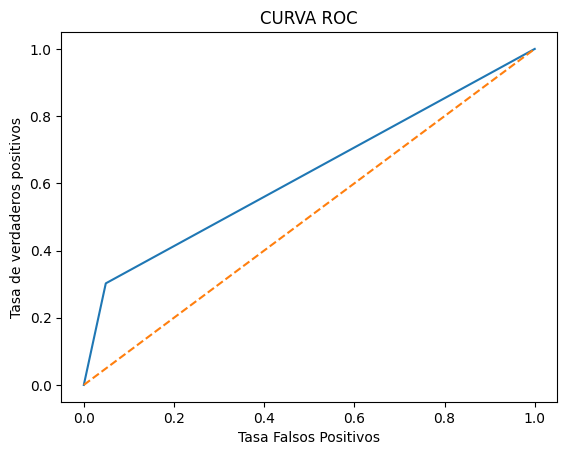

In [50]:
fpr, tpr, umbral=roc_curve(y_test,y_predict)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()

In [51]:
print("Área bajo la curva", auc(fpr,tpr))

Área bajo la curva 0.6267799106498009


In [52]:
Kpliegues=KFold(n_splits=5)
scores=cross_val_score(modeloNB,X_train,y_train, cv=Kpliegues)
print("Score Nayve Bayes con Cross Validation",scores)
print("Promedio de los scores", scores.mean())
print("Varianza de los scores",scores.var())
print("Número de pliegues usados", len(scores))

Score Nayve Bayes con Cross Validation [0.80921305 0.78809981 0.79059501 0.79823383 0.79055481]
Promedio de los scores 0.7953393009072958
Varianza de los scores 5.973383201289852e-05
Número de pliegues usados 5


Si bien nos arrojó un resultado considerablemente bueno, veremos si podemos mejorarlo utilizando distintos metodos de balanceo.

In [53]:
y_train.value_counts()

income
0    19775
1     6273
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

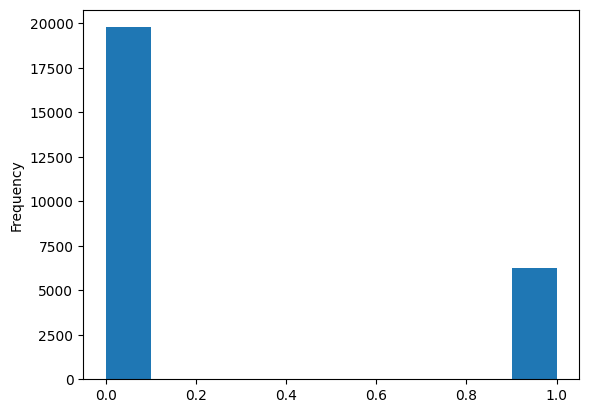

In [54]:
y_train.plot.hist()

In [55]:
!pip install imblearn

Haremos balanceo de datos para intentar lograr una mejora en los resultados, primero probaremos primero con undersampling.

### UNDERSAMPLING

12546
income
0    6273
1    6273
Name: count, dtype: int64


<Axes: >

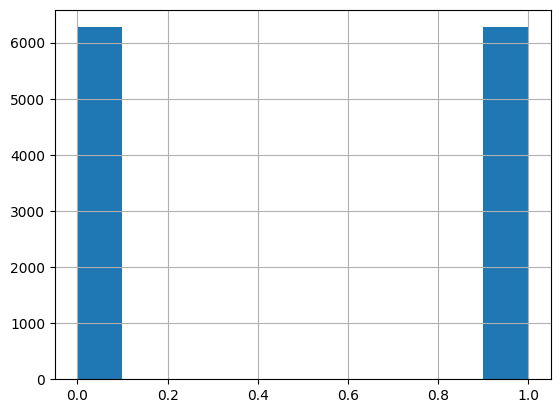

In [56]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(len(y_resampled))
print(y_resampled.value_counts())
y_resampled.hist()

In [57]:
modeloNB2=GaussianNB()

In [58]:
modeloNB2.fit(X_resampled,y_resampled)

GaussianNB()

In [59]:
#guardar el modelo modeloNB2 en un archivo
jb.dump(modeloNB2, "modeloNB2.bin", compress=True)

['modeloNB2.bin']

In [60]:
y_predict2=modeloNB2.predict(X_test)

In [61]:
y_predict2df = pd.DataFrame(y_predict2, columns=["prediccion2"])

In [62]:
comparativo2 = pd.concat([y_test_ordenado, y_predict2df], axis=1)
print(comparativo2.head(20))

    income  prediccion2
0        0            0
1        0            0
2        0            0
3        0            0
4        1            0
5        0            0
6        1            0
7        0            0
8        1            1
9        0            0
10       0            0
11       0            0
12       0            0
13       0            0
14       0            0
15       0            0
16       0            0
17       0            0
18       0            0
19       1            1


In [63]:
modeloNB2.score(X_test,y_test)

0.7907262398280362

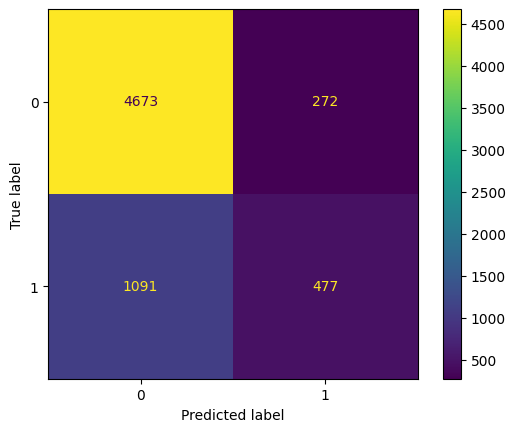

In [64]:
matrix=confusion_matrix(y_test,y_predict2)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloNB2.classes_)
mostrarMatrix.plot()

In [65]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4945
           1       0.64      0.30      0.41      1568

    accuracy                           0.79      6513
   macro avg       0.72      0.62      0.64      6513
weighted avg       0.77      0.79      0.76      6513



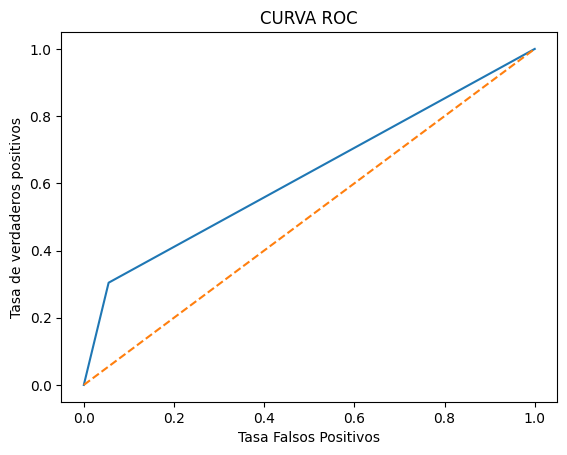

In [66]:
fpr, tpr, umbral=roc_curve(y_test,y_predict2)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()

In [67]:
print("Área bajo la curva", auc(fpr,tpr))

Área bajo la curva 0.6246020640308703


In [68]:
Kpliegues=KFold(n_splits=5)
scores=cross_val_score(modeloNB2,X_resampled,y_resampled, cv=Kpliegues)
print("Score Nayve Bayes con Cross Validation",scores)
print("Promedio de los scores", scores.mean())
print("Varianza de los scores",scores.var())
print("Número de pliegues usados", len(scores))

Score Nayve Bayes con Cross Validation [0.93227092 0.94699083 0.63571144 0.31207652 0.31446792]
Promedio de los scores 0.6283035256344094
Varianza de los scores 0.07850099161768338
Número de pliegues usados 5


Ya que NO hubo mejora de los resultados de undersampling, ahora probaremos con oversampling.

### OVERSAMPLING

In [69]:
df2=df_encoded

In [70]:
df2.drop('fnlwgt', axis=1, inplace=True)

In [71]:
df2.dtypes

age                        int64
education.num              int64
sex                        int64
capital.gain               int64
capital.loss               int64
hours.per.week             int64
income                     int64
race_Amer-Indian-Eskimo    int64
race_Asian-Pac-Islander    int64
race_Black                 int64
race_Other                 int64
race_White                 int64
dtype: object

In [72]:
df2['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [73]:
df2['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [74]:
X2=df2.drop("income",axis=1)
y2=df2["income"]

In [75]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,train_size=0.8,random_state=454,stratify=df2['income'])

39550
income
1    19775
0    19775
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

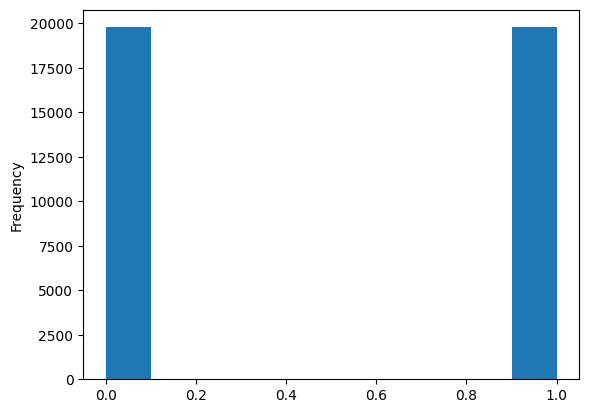

In [76]:
from imblearn.over_sampling import SMOTE

smote2 = SMOTE()

X2_resampled, y2_resampled = smote2.fit_resample (X2_train, y2_train)

print(len(y2_resampled))
print(y2_resampled.value_counts())
y2_resampled.plot.hist()

In [77]:
modeloNB3=GaussianNB()

In [78]:
modeloNB3.fit(X2_resampled,y2_resampled)

GaussianNB()

In [79]:
#guardar el modelo modeloNB3 en un archivo
jb.dump(modeloNB3, "modeloNB3.bin", compress=True)

['modeloNB3.bin']

In [80]:
y_predict3=modeloNB3.predict(X2_test)

In [81]:
y_predict3df = pd.DataFrame(y_predict3, columns=["prediccion3"])

In [82]:
y_test_ordenado2=y2_test.reset_index(drop=True)

In [83]:
comparativo3 = pd.concat([y_test_ordenado2, y_predict3df], axis=1)
print(comparativo3.head(20))

    income  prediccion3
0        0            0
1        0            0
2        0            0
3        0            0
4        1            0
5        0            0
6        1            0
7        0            0
8        1            1
9        0            0
10       0            0
11       0            0
12       0            0
13       0            0
14       0            0
15       0            0
16       0            0
17       0            0
18       0            0
19       1            1


In [84]:
modeloNB3.score(X2_test,y2_test)

0.7930293259634577

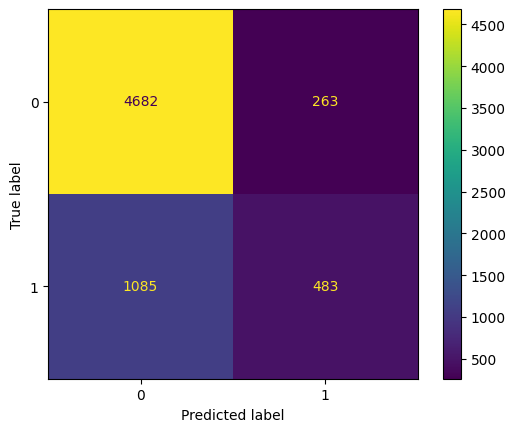

In [85]:
matrix=confusion_matrix(y2_test,y_predict3)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloNB3.classes_)
mostrarMatrix.plot()

In [86]:
print(classification_report(y2_test,y_predict3))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4945
           1       0.65      0.31      0.42      1568

    accuracy                           0.79      6513
   macro avg       0.73      0.63      0.65      6513
weighted avg       0.77      0.79      0.76      6513



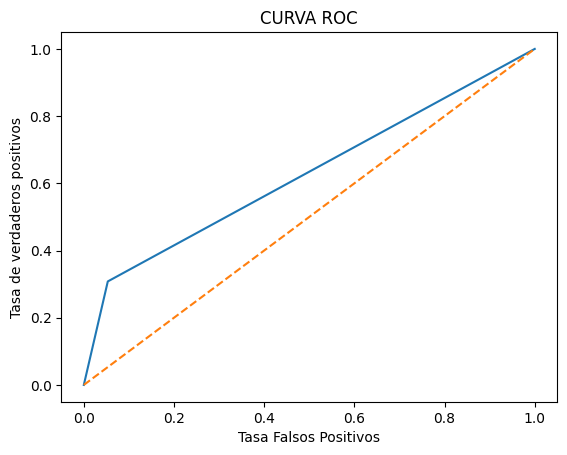

In [87]:
fpr, tpr, umbral=roc_curve(y2_test,y_predict3)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()

In [88]:
print("Área bajo la curva", auc(fpr,tpr))

Área bajo la curva 0.6274253394482162


In [89]:
Kpliegues=KFold(n_splits=5)
scores=cross_val_score(modeloNB3,X2_resampled,y2_resampled, cv=Kpliegues)
print("Score Nayve Bayes con Cross Validation",scores)
print("Promedio de los scores", scores.mean())
print("Varianza de los scores",scores.var())
print("Número de pliegues usados", len(scores))

Score Nayve Bayes con Cross Validation [0.80214918 0.78938053 0.79393173 0.45461441 0.31668774]
Promedio de los scores 0.6313527180783817
Varianza de los scores 0.042165327059635827
Número de pliegues usados 5


Aunque el are bajo la curva mejoró minimamente, el resultado sigue siendo menor que la primera prueba, por lo tanto, conservaremos el modelo de mejor resultado para los siguientes modelos, que fue el modeloNB numero uno.

## Modelo Arbol

In [90]:
# Sirve para crear un modelo de clasificador por árbol de decisión con las siguientes características
modeloArbol=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=5, min_samples_leaf=4, max_depth=5, random_state=444)

In [91]:
#Entrena el modelo de árbol de decisión con los datos de entrenamiento X_train e y_train.
modeloArbol.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=5, random_state=444)

In [92]:
import joblib as jb

In [93]:
# Guarda el modelo de árbol de decisión en un archivo binario comprimido llamado ModeloArbol.bin.
jb.dump(modeloArbol, "ModeloArbol.bin", compress=True)

['ModeloArbol.bin']

In [94]:
# Obtiene las etiquetas de las clases que el modelo de árbol de decisión puede predecir.
modeloArbol.classes_

array([0, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

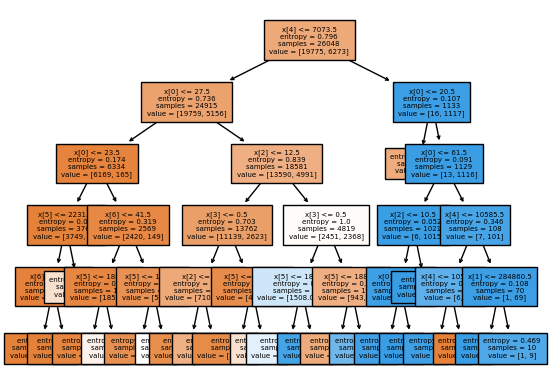

In [95]:
# Visualiza y guarda el árbol de decisión en un archivo llamado mi_arbol.jpg.
tree.plot_tree(modeloArbol, filled=True, fontsize=5)
plt.savefig("mi_arbol.jpg")
plt.show

In [96]:
# Obtiene el número máximo de características utilizadas por el modelo de árbol de decisión.
modeloArbol.max_features_

12

In [97]:
caracteristicas

['age',
 'fnlwgt',
 'education.num',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'income',
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White']

In [98]:
# Obtiene la importancia de cada característica en el modelo de árbol de decisión.
modeloArbol.feature_importances_

array([0.27926394, 0.0004468 , 0.20267762, 0.1050487 , 0.3608927 ,
       0.04523532, 0.00643493, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

El numero maximo de caracteristicas utilizadas para el modelo de arbol son 12 pero como se tienen 13 caracteristicas se puede hacer 2 cosas, quitar alguna de las caracteristicas que no influyan tanto en cuanto a la predicción o "obligar" al modelo a usar las 13 caracteristicas. Para este caso, se utilizo la linea de codigo anterior para determinar la importancia de cada caracteristica, el resultado de esta linea de codigo dio como resultado que todas las columnas relacionadas con la "raza" no tienen importancia para la predicción No significa exactamente que la característica sea completamente irrelevante pero no tiene la misma importancia que la caracteristica "age". Por ende se elimino la caracteristica "race_Other".

In [99]:
#Visualizar el árbol de decisión como texto
print(tree.export_text(modeloArbol, feature_names = ['age', 'fnlwgt', 'education.num', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'income', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander',
        'race_Black' , 'race_White']))

|--- capital.gain <= 7073.50
|   |--- age <= 27.50
|   |   |--- age <= 23.50
|   |   |   |--- capital.loss <= 2231.50
|   |   |   |   |--- hours.per.week <= 31.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- hours.per.week >  31.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- capital.loss >  2231.50
|   |   |   |   |--- class: 0
|   |   |--- age >  23.50
|   |   |   |--- hours.per.week <= 41.50
|   |   |   |   |--- capital.loss <= 1881.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- capital.loss >  1881.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- hours.per.week >  41.50
|   |   |   |   |--- capital.loss <= 1787.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- capital.loss >  1787.00
|   |   |   |   |   |--- class: 0
|   |--- age >  27.50
|   |   |--- education.num <= 12.50
|   |   |   |--- sex <= 0.50
|   |   |   |   |--- education.num <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- education.num >  8.50
|   |   |   |   |   |-

In [100]:
# Evalúa el rendimiento del modelo de árbol de decisión en el conjunto de datos de prueba.
modeloArbol.score(X_test,y_test)

0.8238906801781053

In [101]:
# Predice las etiquetas para el conjunto de datos de prueba.
y_predictA=modeloArbol.predict(X_test)

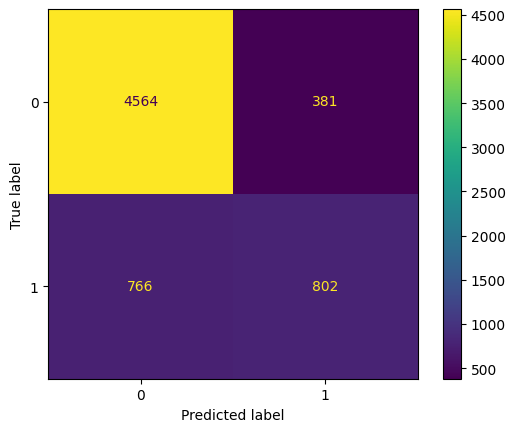

In [102]:
#Se visualiza una matriz de confusión para evaluar el rendimiento de un modelo de clasificación,
#comparando las etiquetas reales con las predichas y mostrando dónde el modelo acierta y dónde comete errores.
matrix=confusion_matrix(y_test,y_predictA)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloArbol.classes_)
mostrarMatrix.plot()

In [103]:
# Predice las etiquetas para el conjunto de datos de prueba utilizando dos modelos diferentes.
y_predictnb=modeloNB.predict(X_test) #Modelo bayes
y_predictdt=modeloArbol.predict(X_test) #Modelo arbol

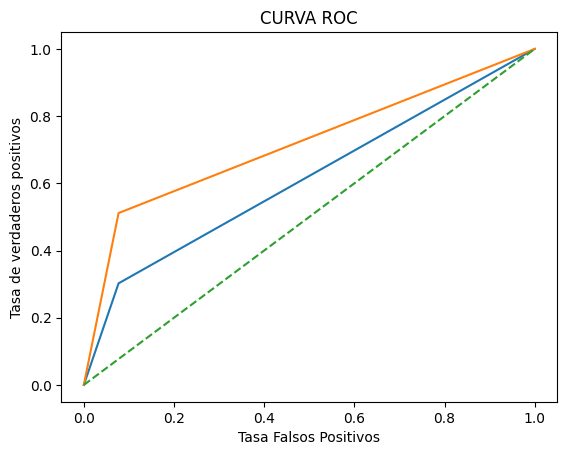

In [104]:
# Muestra la curva ROC para dos modelos y compara su rendimiento.
#Calcula la tasa de falsos positivos (fpr), la tasa de verdaderos positivos (tpr) y los umbrales de decisión 
#para ambos modelos
fpr, tprnb, umbral=roc_curve(y_test,y_predictnb) # Curva azul modelo bayes
fpr, tprdt, umbral=roc_curve(y_test,y_predictdt) # Curva naranja arbol
plt.plot(fpr,tprnb)
plt.plot(fpr,tprdt)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()

In [105]:
print("Área bajo la curva Modelo bayes", auc(fpr,tprnb))  #Modelo bayes

Área bajo la curva Modelo bayes 0.6126241978085472


In [106]:
print("Área bajo la curva Modelo arbol", auc(fpr,tprdt)) #Modelo arbol

Área bajo la curva Modelo arbol 0.717216034543241


## Modelo Bosque Aleatorio

Se crea un clasificador de bosque aleatorio con 20 árboles de decisión, utilizando el índice de Gini 
como criterio de división y aplicando varias técnicas para mejorar la robustez y la generalización del modelo.

In [107]:
modeloBosque = RandomForestClassifier(n_estimators=20,
                                      criterion="gini",
                                      bootstrap=True,
                                      max_features="sqrt",
                                      max_samples=3/4,
                                      oob_score=True,
                                      random_state=99999)

In [108]:
modeloBosque.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.75, n_estimators=20, oob_score=True,
                       random_state=99999)

In [109]:
# Entrena el modelo de bosque aleatorio con el conjunto de datos de entrenamiento.
modeloBosque.score(X_test,y_test)

0.8258866881621373

In [110]:
#SE USA PARA VISUALIZAR EL BOSQUE
#for i in modeloBosque.estimators_:
#    tree.plot_tree(i)
#    plt.show()

In [111]:
# Guarda el modelo de bosque aleatorio en un archivo binario.
jb.dump(modeloBosque,"modelobosque.bin")

['modelobosque.bin']

In [112]:
# Realiza predicciones con el modelo de bosque aleatorio en el conjunto de datos de prueba.
y_predict=modeloBosque.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 0, 0])

In [113]:
# Se muestra la precisión de dos modelos (Arbol y Bosque) en el conjunto de datos de prueba.
print(modeloBosque.score(X_test,y_test),modeloArbol.score(X_test,y_test))

0.8258866881621373 0.8238906801781053


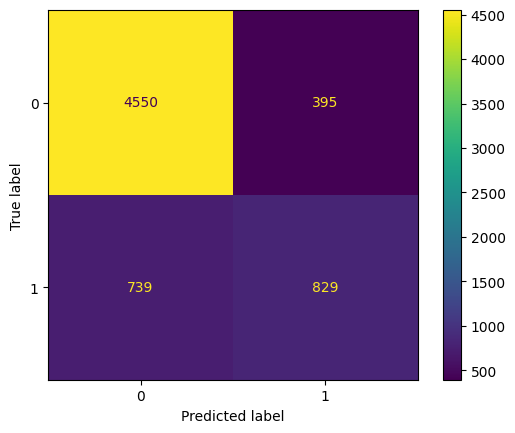

In [114]:
matrix=confusion_matrix(y_test,y_predict)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloBosque.classes_)
mostrarMatrix.plot()

In [115]:
print('Acurracy de entrenamiento', modeloBosque.score(X_train,y_train))
print('Acurracy de datos de prueba', modeloBosque.score(X_test,y_test))
print('Acurracy de validaci+ón (OOBs)', modeloBosque.oob_score_)

Acurracy de entrenamiento 0.9753531941031941
Acurracy de datos de prueba 0.8258866881621373
Acurracy de validaci+ón (OOBs) 0.8229422604422605


Se realiza una búsqueda para encontrar el número óptimo de árboles en un clasificador Random Forest. Se entrenan 80 modelos diferentes con un número variable de árboles y se almacena su precisión en el conjunto de datos de prueba y su puntuación OOB.

In [116]:
# Búsqueda del número óptimo de árboles en un clasificador Random Forest.
train_score=[]
oob_score=[]

estimadores=range(20,100,1)

for estimador in estimadores:
  modeloBosque = RandomForestClassifier(n_estimators=estimador,
                                          criterion="gini",
                                          bootstrap=True,
                                          max_features="sqrt",
                                          max_samples=3/4,
                                          oob_score=True,
                                          random_state=99999)
  modeloBosque.fit(X_train,y_train)
  train_score.append(modeloBosque.score(X_test,y_test))
  oob_score.append(modeloBosque.oob_score_)



Este código genera una gráfica que permite visualizar el comportamiento del "Score de Entrenamiento" y el "Out of Bag Score" a medida que aumenta la cantidad de árboles en el clasificador. El punto máximo del "Out of Bag Score" se indica como la cantidad de árboles recomendada.

El valor recomendado (numero arboles): 83


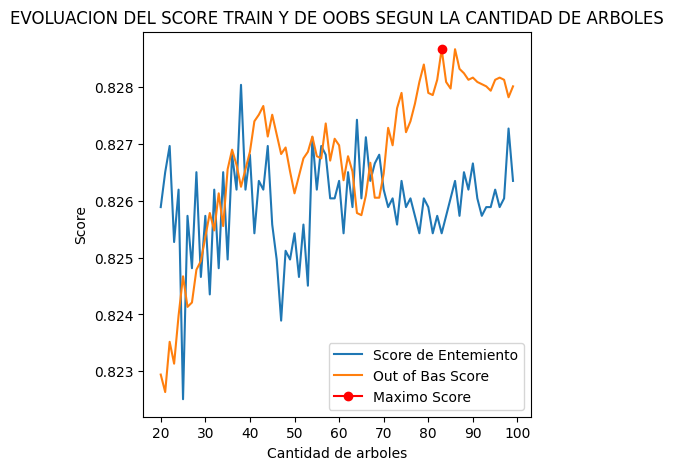

In [117]:
# Gráfica para la evaluación del número de árboles en un clasificador Random Forest.
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(estimadores,train_score,label="Score de Entemiento")
ax.plot(estimadores,oob_score,label="Out of Bas Score")
ax.plot(estimadores[np.argmax(oob_score)], max(oob_score), marker="o",color="red",label="Maximo Score")
ax.set_ylabel('Score')
ax.set_xlabel("Cantidad de arboles")
ax.set_title("EVOLUACION DEL SCORE TRAIN Y DE OOBS SEGUN LA CANTIDAD DE ARBOLES")
plt.legend()
print(f"El valor recomendado (numero arboles): {estimadores[np.argmax(oob_score)]}")


- La imagen muestra que el "Score Train" y el "OOBs" aumentan ligeramente a medida que aumenta la cantidad de árboles.
- El aumento del "Score Train" indica que el modelo se vuelve más preciso.
- El aumento del "OOBs" indica que el error del modelo aumenta ligeramente.

In [118]:
importancia=modeloBosque.feature_importances_

In [119]:
modeloBosque.feature_names_in_

array(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
       'race_White'], dtype=object)

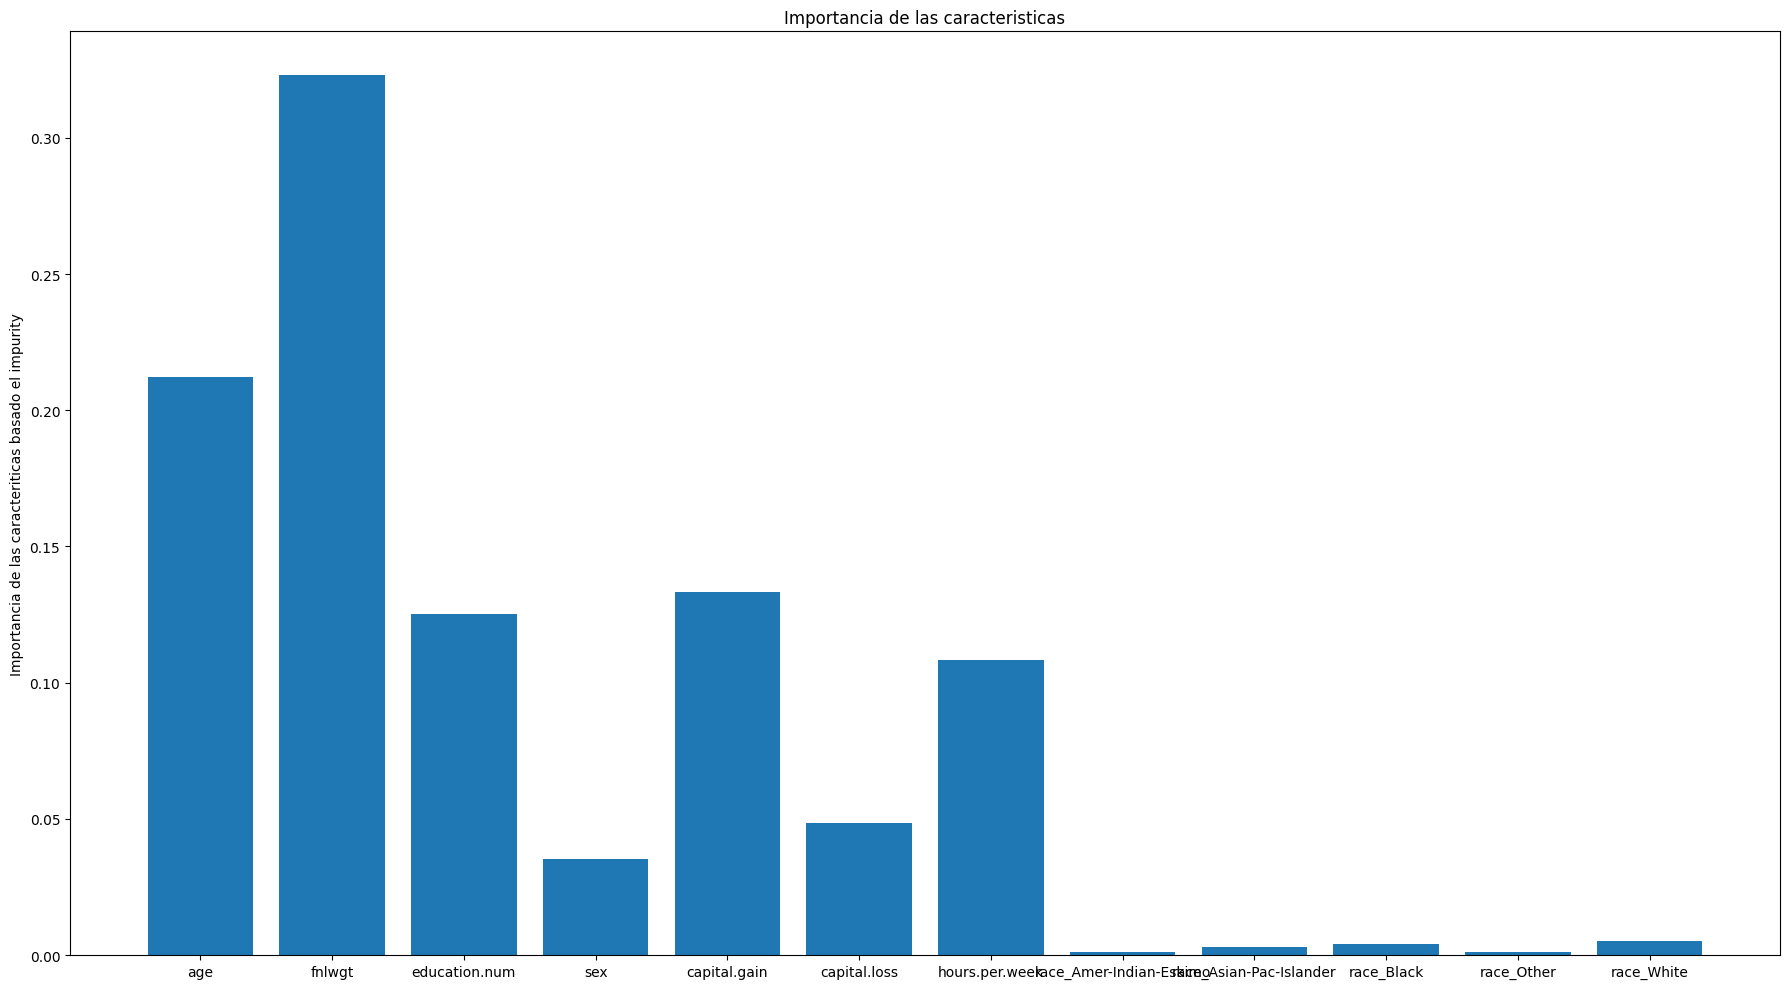

In [120]:
# Gráfica de barras para la importancia de las características en un modelo.
features=['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain',
           'capital.loss', 'hours.per.week', 'race_Amer-Indian-Eskimo',
           'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
           'race_White']

importancia_pronostico=pd.Series(importancia,index=features)
fig,ax=plt.subplots(figsize=(18,10))
ax.bar(features,importancia)
ax.set_title("Importancia de las caracteristicas")
ax.set_ylabel("Importancia de las caracteriticas basado el impurity")
fig.tight_layout()

## ParameterGrid

In [121]:
from sklearn.model_selection import ParameterGrid

El siguiente código define un conjunto de parámetros para una búsqueda de hiperparámetros en un modelo de clasificador de árbol. La búsqueda de hiperparámetros puede ayudar a encontrar la mejor configuración de los parámetros para mejorar el rendimiento del modelo.

In [122]:
parametros= ParameterGrid(
    {'n_estimators':[30,40,60,70,83],
     'max_features':[10,11,12],
     'max_depth':[None,6,10,15],
     'criterion':['gini','entropy']})

In [123]:
resultados={'parametrosfinal':[],'oobs_score':[]}

Este código entrena un modelo de clasificador Random Forest para cada configuración de parámetros en el diccionario parametros y guarda la puntuación OOB de cada modelo. La puntuación OOB se puede utilizar para comparar las diferentes configuraciones de parámetros y seleccionar la mejor para el modelo.

In [124]:
for parametro in parametros:
   modeloBosque = RandomForestClassifier( oob_score=True,
                                          random_state=99999,
                                          ** parametro)
   modeloBosque.fit(X_train,y_train)
   resultados['parametrosfinal'].append(parametro)
   resultados['oobs_score'].append(modeloBosque.oob_score_)
   print(f"Modelo : {parametro} \u2713", modeloBosque.oob_score_)

Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 30} ✓ 0.8176827395577395
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 40} ✓ 0.8203316953316954
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 60} ✓ 0.8231342137592138
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 70} ✓ 0.823671683046683
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 83} ✓ 0.8240555896805897
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 11, 'n_estimators': 30} ✓ 0.8172604422604423
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 11, 'n_estimators': 40} ✓ 0.8196406633906634
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 11, 'n_estimators': 60} ✓ 0.8213298525798526
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 11, 'n_estimators': 70} ✓ 0.8222128378378378
Mo

In [125]:
#Creación de una tabla con los resultados de la búsqueda de hiperparámetros y ordenación por la puntuación OOB.
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['parametrosfinal'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oobs_score', ascending=False)
resultados = resultados.drop(columns=('parametrosfinal'))
resultados.head()

,oobs_score,criterion,max_depth,max_features,n_estimators
37,0.844633,gini,10.0,11,60
34,0.844556,gini,10.0,10,83
32,0.844364,gini,10.0,10,60
33,0.844326,gini,10.0,10,70
99,0.844287,entropy,10.0,11,83


## GradientBoostingClassifier

Se crea un modelo de clasificación por gradiente boosting, se entrena con un conjunto de datos y, opcionalmente, realiza predicciones sobre nuevos datos.

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
modelogbc = GradientBoostingClassifier(n_estimators=100,
                                       learning_rate=1.0,
                                       max_depth=1, random_state=0)
modelogbc=modelogbc.fit(X_train, y_train)   #modelogbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
modelogbc.predict(X_test)

array([0, 0, 1, ..., 0, 0, 1])

In [127]:
#permite evaluar qué tan bien el modelo entrenado se ajusta a los datos de entrenamiento
modelogbc.score(X_train, y_train)

0.8470899877149877

In [128]:
# Definición de un conjunto de parámetros para una búsqueda de hiperparámetros en un modelo de clasificador Gradient Boosting.
parametros= ParameterGrid(
    {'n_estimators':[30,40,60,70,83],
     'learning_rate':np.arange(0.1,1.2,0.2),
     'max_depth':[None,1,2,4]})

In [129]:
resultados={'parametrosfinal':[],'score':[]}

El siguiente código realiza una búsqueda de hiperparámetros simple. Itera a través de todas las combinaciones de parámetros definidos, entrena un modelo Gradient Boosting para cada combinación, y almacena la configuración de parámetros y la precisión obtenida en el conjunto de entrenamiento.

In [130]:
for parametro in parametros:
   modelogbc = GradientBoostingClassifier(random_state=99999,
                                          ** parametro)
   modelogbc.fit(X_train,y_train)
   resultados['parametrosfinal'].append(parametro)
   resultados['score'].append(modelogbc.score(X_train, y_train))
   print(f"Modelo : {parametro} \u2713",modelogbc.score(X_train, y_train))

Modelo : {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 30} ✓ 0.9988482800982801
Modelo : {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 40} ✓ 0.9988482800982801
Modelo : {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 60} ✓ 0.9988482800982801
Modelo : {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 70} ✓ 0.9988482800982801
Modelo : {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 83} ✓ 0.9988482800982801
Modelo : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 30} ✓ 0.8109259828009828
Modelo : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 40} ✓ 0.8133062039312039
Modelo : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 60} ✓ 0.8249001842751843
Modelo : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 70} ✓ 0.8311578624078624
Modelo : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 83} ✓ 0.8346514127764127
Modelo : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 30} ✓ 0.8347281941031941
Modelo

In [131]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['parametrosfinal'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('score', ascending=False)
resultados = resultados.drop(columns=('parametrosfinal'))
resultados.head(10)

,score,learning_rate,max_depth,n_estimators
103,0.998848,1.1,NaN,70.0
102,0.998848,1.1,NaN,60.0
101,0.998848,1.1,NaN,40.0
100,0.998848,1.1,NaN,30.0
21,0.998848,0.3,NaN,40.0
20,0.998848,0.3,NaN,30.0
22,0.998848,0.3,NaN,60.0
24,0.998848,0.3,NaN,83.0
80,0.998848,0.9,NaN,30.0
81,0.998848,0.9,NaN,40.0


## XGBOOST

In [132]:
!pip3 install xgboost

In [133]:
import xgboost as xgb

# Se crea regression matrices con los datos de entranamientos
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

Se define un diccionario que contiene hiperparámetros para un modelo. Especifica la tasa de aprendizaje, el número de estimadores (árboles) y, potencialmente, la función de pérdida para una tarea de clasificación binaria. Estos hiperparámetros se pueden usar para ajustar el rendimiento del modelo.

In [134]:
# Defina hyperparameters
params = {"learning_rate": 0.1,
          "objective":'binary:logistic'}

Se define una lista que se utiliza para evaluar el rendimiento de un modelo XGBoost durante el entrenamiento. La lista contiene dos conjuntos de datos (prueba y entrenamiento) y sus nombres de evaluación. XGBoost utilizará esta información para calcular y mostrar métricas de evaluación durante el proceso de entrenamiento.

In [135]:
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

Se entrena un modelo XGBoost utilizando los hiperparámetros, datos y configuración de rondas de boosting especificados. La variable modeloXGBoost almacena el modelo entrenado y se puede utilizar para realizar predicciones.

In [136]:
n = 1000
modeloXGBoost = xgb.train(params=params,
                          dtrain=dtrain_reg,
                          num_boost_round=n,
                          evals=evals,
                          verbose_eval=50)

[0]	validation-logloss:0.52029	train-logloss:0.52039
[50]	validation-logloss:0.33027	train-logloss:0.32628
[100]	validation-logloss:0.32215	train-logloss:0.31006
[150]	validation-logloss:0.32070	train-logloss:0.30171
[200]	validation-logloss:0.32082	train-logloss:0.29423
[250]	validation-logloss:0.32142	train-logloss:0.28842
[300]	validation-logloss:0.32250	train-logloss:0.28144
[350]	validation-logloss:0.32342	train-logloss:0.27660
[400]	validation-logloss:0.32488	train-logloss:0.27173
[450]	validation-logloss:0.32654	train-logloss:0.26642
[500]	validation-logloss:0.32742	train-logloss:0.26216
[550]	validation-logloss:0.32846	train-logloss:0.25904
[600]	validation-logloss:0.32977	train-logloss:0.25653
[650]	validation-logloss:0.33041	train-logloss:0.25450
[700]	validation-logloss:0.33178	train-logloss:0.25139
[750]	validation-logloss:0.33359	train-logloss:0.24578
[800]	validation-logloss:0.33534	train-logloss:0.24167
[850]	validation-logloss:0.33587	train-logloss:0.24011
[900]	validat

Esta línea de código entrena un modelo XGBoost con 50 rondas de boosting, lo que resulta en un modelo más simple y menos propenso a sobreajustarse a los datos de entrenamiento. La variable modeloXGBoost almacena el modelo entrenado y se puede utilizar para realizar predicciones.

In [137]:
n = 50
modeloXGBoost = xgb.train(params=params,
                          dtrain=dtrain_reg,
                          num_boost_round=n)

In [138]:
preds = modeloXGBoost.predict(dtest_reg)
preds

array([0.13649994, 0.09484437, 0.5779294 , ..., 0.04981072, 0.06410254,
       0.47322443], dtype=float32)

In [139]:
prediccion=np.absolute(np.round(preds, decimals=0, out=None))
prediccion

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [140]:
from sklearn.metrics import accuracy_score
print("El score para XGBOOST es: ", accuracy_score(y_test,prediccion))

El score para XGBOOST es:  0.8506064793489944


## Modelo con mayor presición

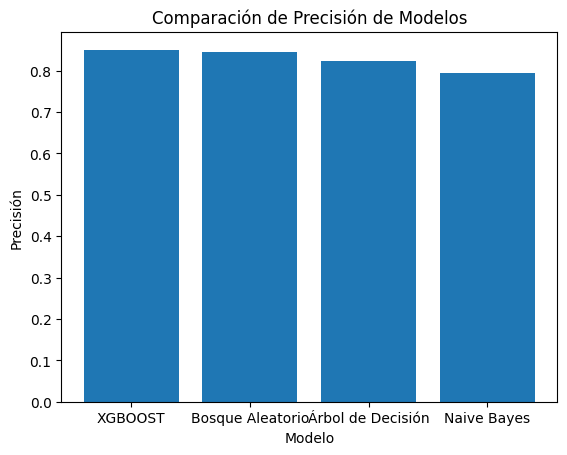

In [154]:

# Precisión de cada modelo
precision_xg = accuracy_score(y_test, prediccion)
precision_bosque = modeloBosque.score(X_test, y_test)
precision_arbol = modeloArbol.score(X_test, y_test)
precision_nb = modeloNB.score(X_test, y_test)

# Nombres de los modelos
nombres_modelos = ["XGBOOST", "Bosque Aleatorio", "Árbol de Decisión", "Naive Bayes"]

# Crear la gráfica
plt.bar(nombres_modelos, [precision_xg, precision_bosque, precision_arbol, precision_nb])
plt.xlabel("Modelo")
plt.ylabel("Precisión")
plt.title("Comparación de Precisión de Modelos")

# Mostrar la gráfica
plt.show()


In [158]:
precision_xg = accuracy_score(y_test, prediccion)
precision_bosque = modeloBosque.score(X_test, y_test)
precision_arbol = modeloArbol.score(X_test, y_test)
precision_nb = modeloNB.score(X_test, y_test)

print("Presición modelo Naive Bayes", precision_nb)
print("Presición modelo Árbol de Decisión",precision_arbol)
print("Presición modelo Bosque Aleatorio",precision_bosque)
print("Presición modelo XGBOOST",precision_xg)

Presición modelo Naive Bayes 0.7950253339474896
Presición modelo Árbol de Decisión 0.8238906801781053
Presición modelo Bosque Aleatorio 0.8458467680024566
Presición modelo XGBOOST 0.8506064793489944


Análisis del gráfico de precisión de modelos:
Conclusiones:

- XGBOOST tiene la mayor precisión entre los modelos comparados, con un valor cercano al 90%.
- Bosque Aleatorio le sigue en segundo lugar con una precisión cercana al 85%.
- Árbol de Decisión y Naive Bayes tienen una precisión similar, alrededor del 80%.

El rendimiento tan acertado de XGBoost puede ser atribuida a su capacidad para manejar problemas complejos, su algoritmo regularizado, su eficiencia y la posibilidad de comprender especialmente aquellos DataFrames con conjuntos de datos de alta dimensionalidad o con características no lineales (categoricas), como por ejemplo: el sexo, raza, entre otras. El bosque aleatorio tambien funciona de una manera similar, donde la principal diferencia y lo que hace que el modelo XGBOOST tenga mayor presicion es que dicho modelo (XGBOOST) poda los arboles basado en la ganancia de información, es decir: Se eliminan ramas que no aportan información relevante para la predicción. En cambio, el bosque poda los arboles antes y despues del entrenamiento que, si bien es cierto que tambien cumplen el principio de eliminar informacion que no sea tan necesaria al utilizarse datos categoricos, este está sujeto en algunas ocasiones a omitir detalles de la información. Por otro lado, modelos como Árbol de Decisión o Naive Bayes se centran un poco más en la simplicidad y en la rapidez al momento de realizar predicciones, por lo que puede suceder que hasta que no se tenga un preprocesamiento muy bueno no habrá una alta presición.
